<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/Lab1_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1. What would be the most commonly used level of measurement if the variable is the temperature of the air?

 Interval

2. Write a Python code to import the data file 'L1data.csv' (introduced in Lecture 1).

Code an imputation for replacing the NaN values in the "Age" column with the median of the column.
The NaN instances are replaced by...?

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('drive/MyDrive/Colab_Notebooks/L1Data.csv')
data

,Class,Age,Funds,Sale
0,Freshmen,18.0,600.0,No
1,Freshmen,18.0,500.0,No
2,Freshmen,18.0,600.0,No
3,Senior,23.0,800.0,No
4,Junior,21.0,400.0,Yes
5,Freshmen,19.0,600.0,No
6,Freshmen,20.0,600.0,No
7,Senior,24.0,NaN,Yes
8,Sophomore,23.0,620.0,Yes
9,Sophomore,25.0,800.0,Yes


In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='median')
imp.fit(data.loc[:,["Age"]])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [9]:
data.loc[:,["Age"]] = imp.transform(data.loc[:,["Age"]])

In [10]:
data

,Class,Age,Funds,Sale
0,Freshmen,18.0,600.0,No
1,Freshmen,18.0,500.0,No
2,Freshmen,18.0,600.0,No
3,Senior,23.0,800.0,No
4,Junior,21.0,400.0,Yes
5,Freshmen,19.0,600.0,No
6,Freshmen,20.0,600.0,No
7,Senior,24.0,NaN,Yes
8,Sophomore,23.0,620.0,Yes
9,Sophomore,25.0,800.0,Yes


3. In Bayesian inference the "likelihood" represents:

  How probable is the data (evidence) given that our hypothesis is true.

4. The main goal of Monte Carlo simulations is to solve problems by approximating a probability value via carefully designed simulations.

  True

5. Assume that during a pandemic 15% of the population gets infected with a respiratory virus while about 35% of the population has some general respiratory symptoms such as sneezing, stuffy nose etc.

Assume that approximately 30% of the people infected with the virus are asymptomatic.

What is the probability that someone who has the symptom actually has the disease?


- Assume that $15\%$ of the population has a disease and label this event by $A$.
- Assume that $35\%$ of the population has the symptom (label the event of someone having the symptom by $B$) and that of those who have the disease, about $70\%$ have the symptom.

What is the probability that someone who has the symptom actually has the disease?

$$\Large{P\left (A\,|\,B\right )=\frac{P(B\,|\,A)P(A)}{P(B)}=\frac{0.70\cdot 0.15}{0.35}=0.30}$$

6. A Monte Carlo simulation should never include more than 1000 repetitions of the experiment.

  False

7. One can decide that the number of iterations in a Monte Carlo simulation was sufficient by visualizing a Probability-Iteration plot and determining where the probability graph approaches a horizontal line.

  True

8. Assume we play a slightly bit different version of the original Monte Hall problem such as having four doors one car and three goats.


***The rules of the game are the same, the contestant chooses one door (that remains closed) and one of the other doors who had a goat behind it is being opened.

**The contestant has to make a choice as to stick with the original choice or rather switch for one of the remaining closed doors.

Write a Python code to approximate the winning probabilities, for each choice, by the means of Monte Carlo simulations. The probability that the contestant will ultimately win by sticking with the original choice is closer to:

Winning probability if you always switch: 0.7526
Winning probability if you always stick to your original choice: 0.2474


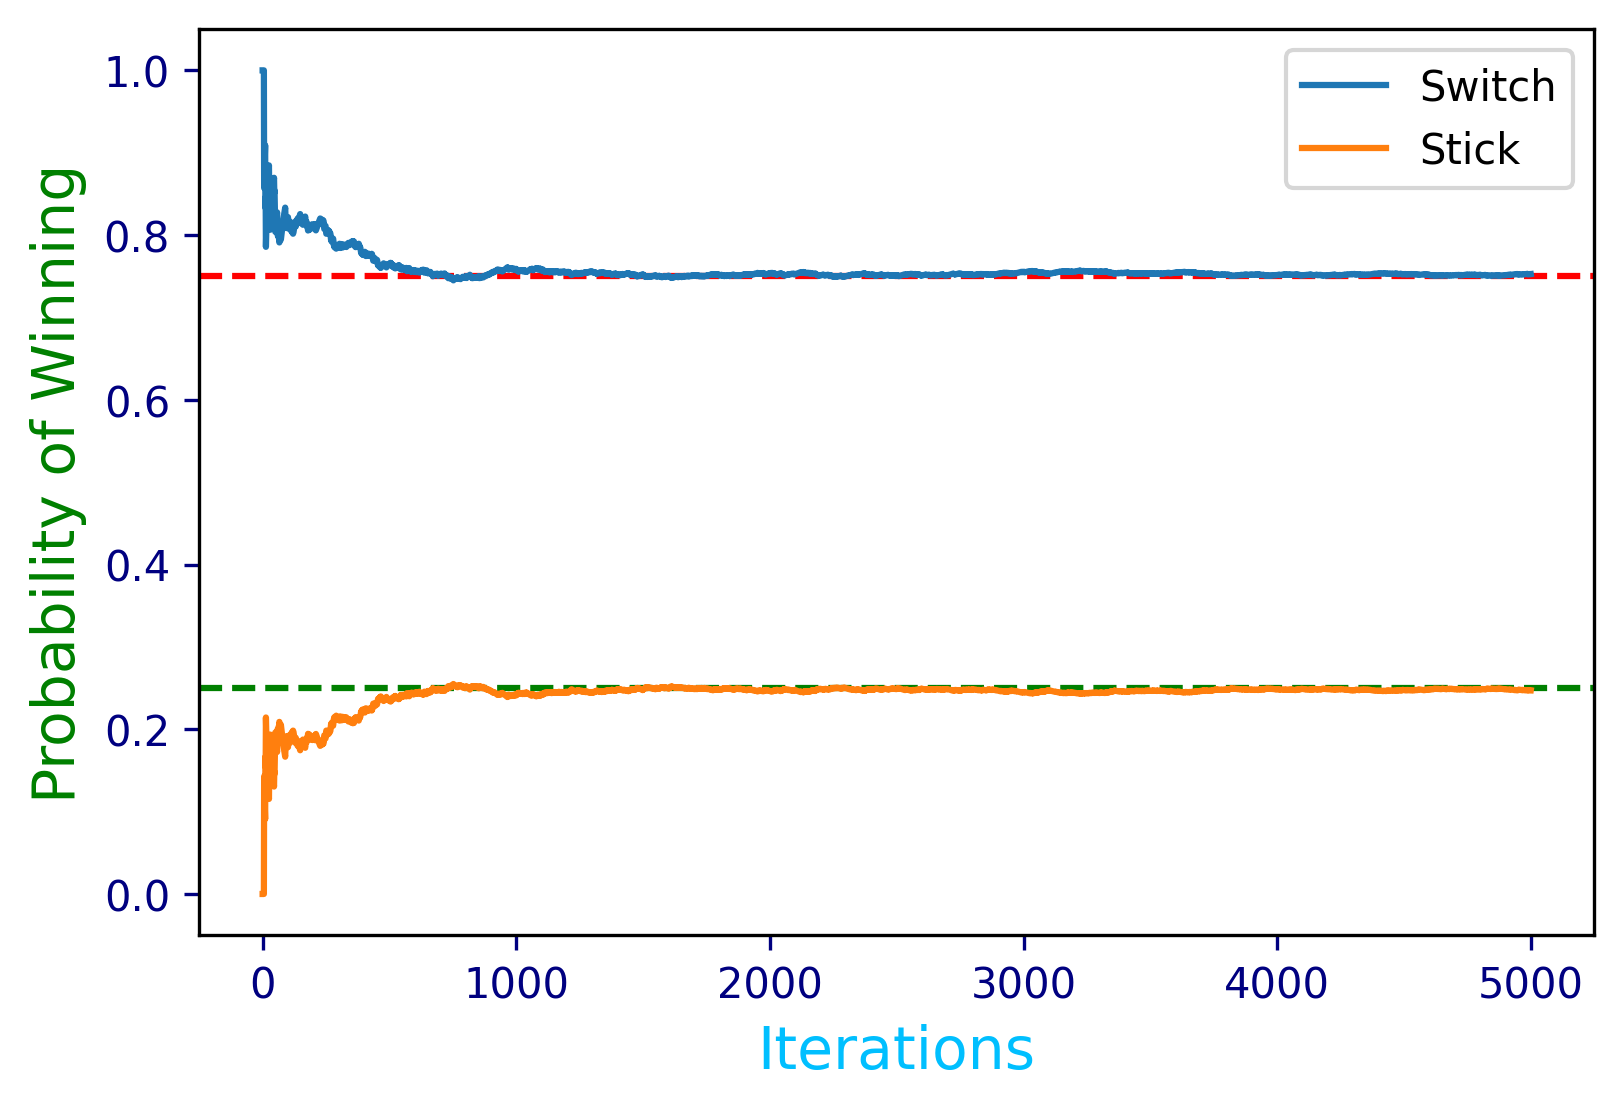

In [29]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

import random
import matplotlib.pyplot as plt

doors = ["goat","goat","car","goat"]

# approximated results
switch_win_probability = []
stick_win_probability = []

plt.axhline(y=0.75, color='red', linestyle='--')
plt.axhline(y=0.25, color='green', linestyle='--')

def monte_carlo(n):

  switch_wins = 0
  stick_wins = 0

  for i in range(n):
     random.shuffle(doors)

     k = random.randrange(4)

     if doors[k] != 'car':
       switch_wins +=1
    
     else:
       stick_wins +=1
    
     switch_win_probability.append(switch_wins/(i+1))
     stick_win_probability.append(stick_wins/(i+1))
    
  plt.plot(switch_win_probability,label='Switch')
  plt.plot(stick_win_probability,label='Stick')
  plt.tick_params(axis='x', colors='navy')
  plt.tick_params(axis='y', colors='navy')
  plt.xlabel('Iterations',fontsize=14,color='DeepSkyBlue')
  plt.ylabel('Probability of Winning',fontsize=14,color='green')
  plt.legend()
  print('Winning probability if you always switch:', switch_win_probability[-1])
  print('Winning probability if you always stick to your original choice:', stick_win_probability[-1])

monte_carlo(5000)

9. In Python one of the libraries that we can use for generating repeated experiments in Monte Carlo simulations is:

  random

10. In Python, for creating a random permutation of an array whose entries are nominal variables we used:

  random.shuffle